In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
plt.rcParams["font.size"]=10
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
RANDOM_SEED = 42
N_SAMPLES = 1000
N_FEATURES = 2
CLUSTER_STD = 2.0

X, y = make_blobs(n_samples=N_SAMPLES,
                  n_features=N_FEATURES,
                  cluster_std=CLUSTER_STD,
                  random_state=RANDOM_SEED)

print(f"Shape of X: {X.shape} and y: {y.shape}")

Shape of X: (1000, 2) and y: (1000,)


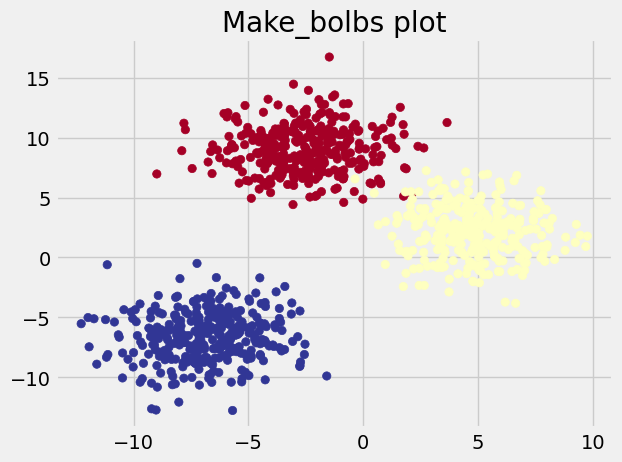

In [3]:
plt.title("Make_bolbs plot")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')
plt.show()

In [4]:
print(f"Sample features of make_blobs are: {X[:5]}")
print(f"Labels of features are: {y[: 5]}")

Sample features of make_blobs are: [[-6.31305145 -7.39791954]
 [-5.39543645 -6.28152443]
 [ 5.75653266  2.12518047]
 [-3.42791942  7.31459739]
 [-3.02838033  6.00800022]]
Labels of features are: [2 2 1 0 0]


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features[:5]

array([[-0.92300289, -1.31982492],
       [-0.74607242, -1.15400582],
       [ 1.40420094,  0.09464908],
       [-0.36670449,  0.86543751],
       [-0.28966713,  0.67136754]])

In [6]:
kmeans = KMeans(init="random",
                 n_clusters=5,
                 n_init=5,
                 max_iter=250,
                 random_state=RANDOM_SEED,
                 verbose=1)

In [7]:
kmeans.fit(scaled_features)

Initialization complete
Iteration 0, inertia 318.6181269409886.
Iteration 1, inertia 169.56771629680574.
Iteration 2, inertia 166.68225655393687.
Iteration 3, inertia 165.68728415916758.
Iteration 4, inertia 165.26856924302191.
Iteration 5, inertia 164.90900545968594.
Iteration 6, inertia 164.7012655191814.
Iteration 7, inertia 164.54617792187716.
Iteration 8, inertia 164.49640646794953.
Iteration 9, inertia 164.4119278972026.
Iteration 10, inertia 164.3129124335095.
Iteration 11, inertia 164.2825280346467.
Iteration 12, inertia 164.25420976584803.
Converged at iteration 12: center shift 7.717055172983486e-06 within tolerance 9.999999999999994e-05.
Initialization complete
Iteration 0, inertia 1594.4248860701173.
Iteration 1, inertia 404.9284192284405.
Iteration 2, inertia 176.14935376716699.
Iteration 3, inertia 171.45067019726952.
Iteration 4, inertia 169.08447874849276.
Iteration 5, inertia 167.4102594707337.
Iteration 6, inertia 166.23957170833347.
Iteration 7, inertia 165.372732220

KMeans(init='random', max_iter=250, n_clusters=5, n_init=5, random_state=42,
       verbose=1)

In [8]:
# The lowest sum of the squared error (SSE)
print(f"Lowest SSE after converges: {kmeans.inertia_}")
# Final locations of the centroid
print(f"Center of cluster: {kmeans.cluster_centers_}")

Lowest SSE after converges: 164.25142956678872
Center of cluster: [[-0.53013878  1.10531128]
 [-0.73998583 -1.12439062]
 [-1.31965517 -1.30668865]
 [ 1.22650898  0.09358287]
 [ 0.0810364   1.12244423]]


In [9]:
kmeans.labels_[:5]

array([1, 1, 3, 0, 0], dtype=int32)

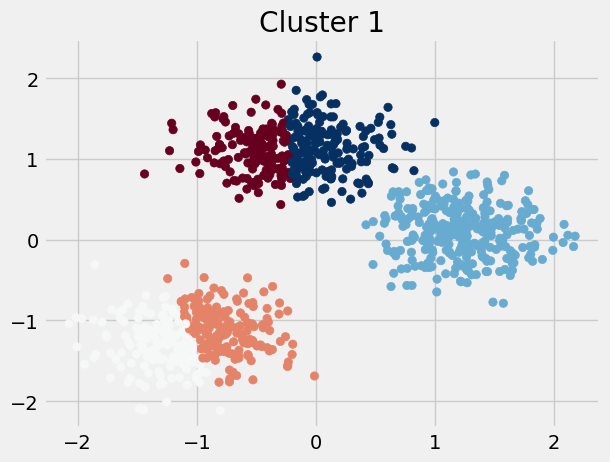

In [10]:
plt.title("Cluster 1")
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap="RdBu")
plt.show()

In [11]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 5,
    "max_iter": 250,
    "random_state": RANDOM_SEED
}

sse=[]
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

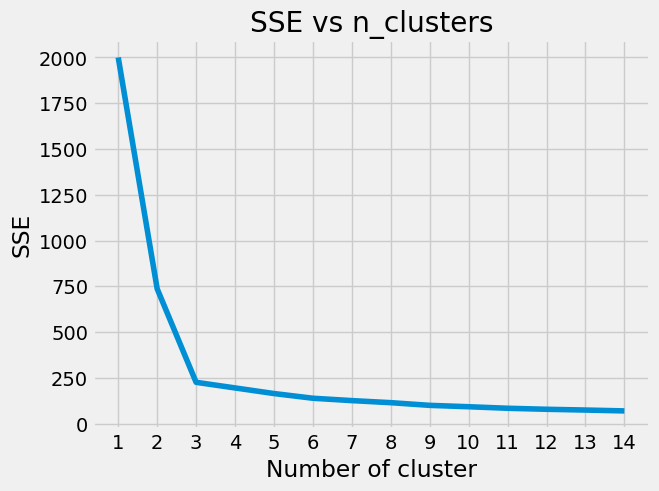

In [12]:
plt.title("SSE vs n_clusters")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Elbow Point
sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3

In [13]:
!pip install kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
knee_elbow = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing"
)
knee_elbow.elbow

3

## silhouette coefficient
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other cluster

In [15]:
from sklearn.metrics import silhouette_score
silhouttte_coeff = []

for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouttte_coeff.append(score)

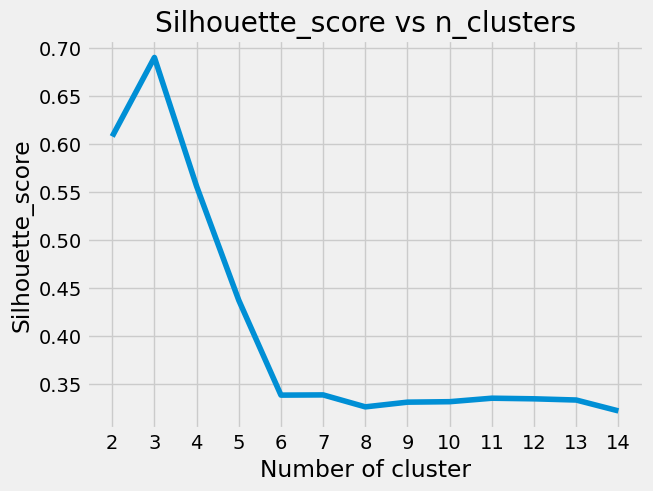

In [16]:
plt.style.use("fivethirtyeight")
plt.title("Silhouette_score vs n_clusters")
plt.plot(range(2, 15), silhouttte_coeff)
plt.xticks(range(2, 15))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette_score")
plt.show()

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=6)
dbscan.fit(scaled_features)

DBSCAN(eps=0.2, min_samples=6)

In [18]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

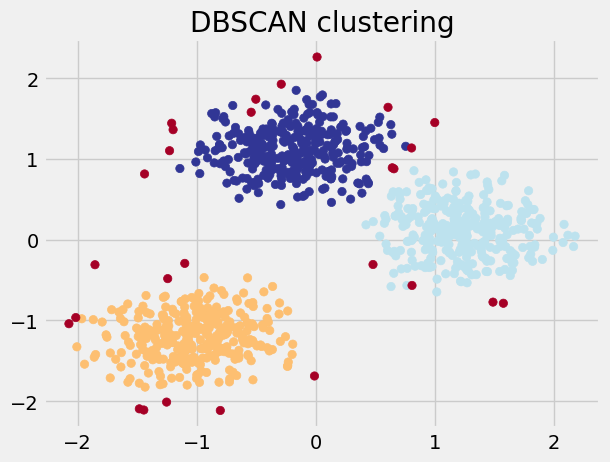

In [19]:
plt.title("DBSCAN clustering")
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan.labels_, cmap="RdYlBu")
plt.show()

In [20]:
dbscan_silhouette  = silhouette_score(scaled_features, dbscan.labels_)
dbscan_silhouette

0.6505996395153893